<a href="https://colab.research.google.com/github/philipp-zettl/ml-roadmap/blob/master/Machine_Learning/Superwised_Learning/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

(Skip to <a href="#model">Model</a> if `bees/processed` present)

In [ ]:
# reset file structure

import os

file_list = list(os.listdir('bees'))
for file in file_list:
  if os.path.isfile(os.path.join('bees', file)):
    os.remove(os.path.join('bees', file))
  elif os.path.isdir(os.path.join('bees', file)):
    os.rmdir(os.path.join('bees', file))

In [1]:
!wget -P bees https://images.newscientist.com/wp-content/uploads/2019/05/20111917/frank-bienewald-alamy-stock-photo.png?width=1200 https://media.wired.com/photos/5bb532b7f8a2e62d0bd5c4e3/1:1/w_1800,h_1800,c_limit/bee-146810332.jpg https://ideas.ted.com/wp-content/uploads/sites/3/2021/03/FINAL_Bees.jpg https://www.jesmond.com/wp-content/uploads/2019/09/bee-2889351_1920__1-1024x768.jpg https://static01.nyt.com/images/2018/06/19/science/08BEES/08BEES-facebookJumbo.jpg?year=2018&h=550&w=1050&s=7cd6f137f4bb566ac7214d1fe35818d8e173d412c531009b3a96028abd1445ed&k=ZQJBKqZ0VN https://www.deutschland.de/sites/default/files/styles/crop_page/public/media/image/tdt_02062020_artenschutz_bienen_honig_sammeln.jpg?h=fbce5161&itok=b68rMtow https://www.familyhandyman.com/wp-content/uploads/2018/08/shutterstock_307000682-bee.jpg?fit=680,680 https://i.guim.co.uk/img/media/9988a21ff2c14703e6be54cf00b584b86764d672/945_1419_3421_2052/master/3421.jpg?width=1200&quality=85&auto=format&fit=max&s=5a2ff79d2d984846bd34a73a121f0ff5 https://media.npr.org/assets/img/2018/06/07/gettyimages-200415242-001_slide-d26f3af782b697f15ceebe2f7c380c0e545dd47b.jpg https://cms.qz.com/wp-content/uploads/2021/01/beeandhoneycomb.jpg?quality=75&strip=all&w=900&h=900&crop=1 https://www.deutschland.de/sites/default/files/styles/crop_story_content/public/media/image/bees-germany-bundestag-protection_0.jpg?itok=zi2no8qX


/bin/bash: https://www.familyhandyman.com/wp-content/uploads/2018/08/shutterstock_307000682-bee.jpg?fit=680,680: No such file or directory
/bin/bash: https://media.npr.org/assets/img/2018/06/07/gettyimages-200415242-001_slide-d26f3af782b697f15ceebe2f7c380c0e545dd47b.jpg: No such file or directory
/bin/bash: https://www.deutschland.de/sites/default/files/styles/crop_page/public/media/image/tdt_02062020_artenschutz_bienen_honig_sammeln.jpg?h=fbce5161: No such file or directory
/bin/bash: https://www.deutschland.de/sites/default/files/styles/crop_story_content/public/media/image/bees-germany-bundestag-protection_0.jpg?itok=zi2no8qX: No such file or directory
--2021-11-03 19:34:08--  https://images.newscientist.com/wp-content/uploads/2019/05/20111917/frank-bienewald-alamy-stock-photo.png?width=1200
Resolving images.newscientist.com (images.newscientist.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to images.newscientist.com (images.newscientist.com)|151.101.2.217|:

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt


bees_path = os.path.join('.', 'bees')
files = list()

# assuming directory was freshly created and does not contain other files than image files
file_list = list(os.listdir(bees_path))
for i, file in enumerate(file_list):
  file_path = os.path.join(bees_path, file)
  new_file_name = f'{bees_path}/{i}.{file.split(".")[-1][:3]}'
  files.append(new_file_name)
  if file_path == new_file_name:
    print('Already processed image found, skipping.')
    continue
  Image.open(file_path).save(new_file_name)
  os.remove(file_path)


In [3]:
print(files)

['./bees/0.png', './bees/1.jpg', './bees/2.jpg', './bees/3.jpg', './bees/4.jpg']


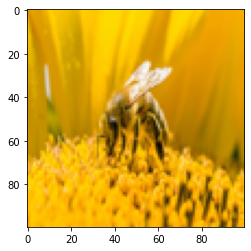

In [4]:
# rescale images and convert files to png format
os.mkdir('bees/scaled')
scaled_files = list()
for i, file_name in enumerate(files):
    img = Image.open(file_name)
    img = img.resize((100, 100))
    scaled_file_name = f'bees/scaled/{i}.png'
    img.save(scaled_file_name, extension='png')
    scaled_files.append(scaled_file_name)

with open(f'bees/scaled/0.png', 'rb') as file:
  img = Image.open(file)
  plt.imshow(img)
  plt.show()

In [5]:
import pandas as pd
import numpy as np

transformations = [
  [],
  [Image.FLIP_TOP_BOTTOM],
  [Image.FLIP_LEFT_RIGHT],
  [Image.FLIP_TOP_BOTTOM, Image.FLIP_LEFT_RIGHT],
]

df = pd.DataFrame({'X' : [], 'y': []})
processed_images = list()
os.mkdir('bees/processed')

for image_id, image in enumerate(scaled_files):
  img = Image.open(image)
  for i, trans in enumerate(transformations):
    cur_img = img.copy()
    for elem in trans:
      cur_img = cur_img.transpose(elem)
    file_name = f'bees/processed/{image_id}_{i}.png'
    cur_img.save(file_name, extension='png')

    elem = pd.DataFrame([[np.array(cur_img), 1]], columns=['X','y'], index=[image_id*4+i])
    df = df.append(elem, ignore_index=True)
    processed_images.append(file_name)

In [14]:

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

new_df = zip(rgb2gray(np.array(df['X'])), df['y'])

# Model



In [ ]:
import torch
flatten = torch.nn.Flatten()
layer1 = torch.nn.Linear(1, 100)
layer2 = torch.nn.Linear(64, 64)
layer3 = torch.nn.Linear(64, 2)
layer4 = torch.nn.Linear(2, 2)

grad = torch.optim.Adam([*layer1.parameters(), *layer2.parameters(), *layer3.parameters(), *layer4.parameters()], lr=0.01)


In [ ]:
df.head

In [16]:
import torch


EPOCHS = 200
errors = []
loss_fn = torch.nn.MSELoss(reduction='sum')

flatten = torch.nn.Flatten()
layer1 = torch.nn.Linear(300, 64)
layer2 = torch.nn.Linear(64, 1)

grad = torch.optim.Adam([*layer1.parameters(), *layer2.parameters()], lr=0.01)


for epoch in range(EPOCHS):
  for X, y in next(new_df):
    X, y = torch.Tensor(X), torch.Tensor(y)
    grad.zero_grad()


    flattened = flatten(X)
    print(flattened.shape)
    flatter = flatten2(flattened)

    print(flatter.shape)
    o1 = layer1(flatter)
    print(o1.shape)
    out = layer2(o1)

    print(out.shape)
    print(y)
    
    err = torch.sum((out - y) ** 2)
    err.backward()

    errors.append(err.item())

    grad.step()


ValueError: ignored

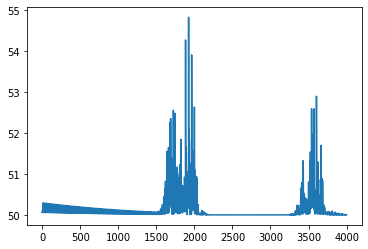

[tensor(50.0595, grad_fn=<SelectBackward>), tensor(50.0592, grad_fn=<SelectBackward>), tensor(50.0630, grad_fn=<SelectBackward>), tensor(50.0619, grad_fn=<SelectBackward>), tensor(50.1069, grad_fn=<SelectBackward>), tensor(50.1014, grad_fn=<SelectBackward>), tensor(50.1053, grad_fn=<SelectBackward>), tensor(50.0701, grad_fn=<SelectBackward>), tensor(50.2296, grad_fn=<SelectBackward>), tensor(50.2412, grad_fn=<SelectBackward>), tensor(50.2129, grad_fn=<SelectBackward>), tensor(50.2201, grad_fn=<SelectBackward>), tensor(50.2168, grad_fn=<SelectBackward>), tensor(50.2154, grad_fn=<SelectBackward>), tensor(50.2958, grad_fn=<SelectBackward>), tensor(50.2824, grad_fn=<SelectBackward>), tensor(50.1263, grad_fn=<SelectBackward>), tensor(50.1271, grad_fn=<SelectBackward>), tensor(50.1546, grad_fn=<SelectBackward>), tensor(50.1544, grad_fn=<SelectBackward>), tensor(50.0588, grad_fn=<SelectBackward>), tensor(50.0584, grad_fn=<SelectBackward>), tensor(50.0620, grad_fn=<SelectBackward>), tensor(50.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(errors)), errors)
plt.show()
print(errors)